### NLTK Inaugural

In [1]:
import nltk
nltk.download(['brown', 'inaugural']) #lookup error 뜨면 quit 누름

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\sunny\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\sunny\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

In [2]:
brown = nltk.corpus.brown

In [3]:
# cfd
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories = genre)
)
modals = ['can', 'could', 'would', 'will', 'might', 'may']
cfd.tabulate(conditions = brown.categories(), samples = modals)
#conditions: 열, samples: 줄

                  can could would  will might   may 
      adventure    46   151   191    50    58     5 
 belles_lettres   246   213   392   236   113   207 
      editorial   121    56   180   233    39    74 
        fiction    37   166   287    52    44     8 
     government   117    38   120   244    13   153 
        hobbies   268    58    78   264    22   131 
          humor    16    30    56    13     8     8 
        learned   365   159   319   340   128   324 
           lore   170   141   186   175    49   165 
        mystery    42   141   186    20    57    13 
           news    93    86   244   389    38    66 
       religion    82    59    68    71    12    78 
        reviews    45    40    47    58    26    45 
        romance    74   193   244    43    51    11 
science_fiction    16    49    79    16    12     4 


In [7]:
#modal의 빈도수가 포함된 cfd(word -> modal_verb)
cfd1 = nltk.ConditionalFreqDist(
    (genre, modal)
    for genre in brown.categories()
    for modal in ['can', 'could', 'would', 'will', 'might', 'may']
    
    for word in brown.words(categories=genre)
        if word.lower() == modal # word 중 modal인 것만 추출
)

cfd1.tabulate()

                  can could   may might  will would 
      adventure    48   154     7    59    51   194 
 belles_lettres   249   216   221   113   246   397 
      editorial   124    57    79    39   235   185 
        fiction    39   168    10    44    56   291 
     government   119    38   179    13   244   120 
        hobbies   276    59   143    22   269    83 
          humor    17    33     8     8    13    56 
        learned   367   159   336   128   340   321 
           lore   170   142   170    50   178   188 
        mystery    45   145    15    57    25   189 
           news    94    87    93    38   389   246 
       religion    84    59    79    12    72    69 
        reviews    45    40    47    26    61    48 
        romance    79   195    11    51    49   247 
science_fiction    16    49     4    12    17    80 


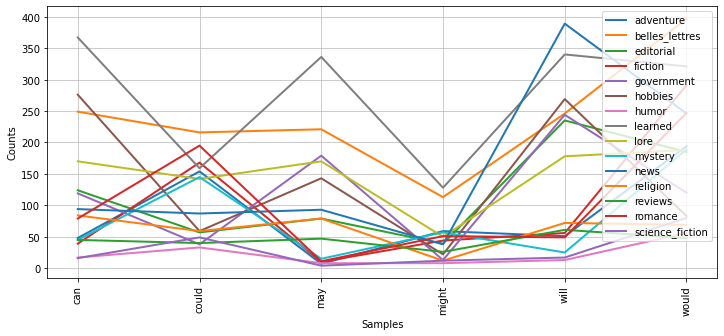

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [6]:
# pip install matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
cfd1.plot()

### Inaugural
- 연설문 코퍼스

In [8]:
## Inaugural
inaugural = nltk.corpus.inaugural

In [14]:
inaugural.fileids() #연도-이름.text ex) '2021-Biden.txt

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [9]:
# ['america', 'citizen'] 빈도수를 cfd로 만드시오. == citizens, citizen's...

In [12]:
cfd2 = nltk.ConditionalFreqDist(
    (target_word, fileid[:-4])
    for fileid in inaugural.fileids()
    for target_word in ['citizen', 'america']
    
    for word in inaugural.words(fileids = fileid)
        #1. if word.lower() == target_word
        #2. if target_word in word.lower()
        #3.
        if word.lower().startswith(target_word)
        # 셋 중 하나 쓰면 됨.
)

In [14]:
#표보다 plot가 더 보기 좋음. 비교
cfd2.tabulate()

        1789-Washington 1793-Washington      1797-Adams  1801-Jefferson  1805-Jefferson    1809-Madison    1813-Madison     1817-Monroe     1821-Monroe      1825-Adams    1829-Jackson    1833-Jackson   1837-VanBuren   1841-Harrison       1845-Polk     1849-Taylor     1853-Pierce   1857-Buchanan    1861-Lincoln    1865-Lincoln      1869-Grant      1873-Grant      1877-Hayes   1881-Garfield  1885-Cleveland   1889-Harrison  1893-Cleveland   1897-McKinley   1901-McKinley  1905-Roosevelt       1909-Taft     1917-Wilson    1921-Harding   1925-Coolidge     1929-Hoover  1933-Roosevelt  1937-Roosevelt  1941-Roosevelt  1945-Roosevelt     1949-Truman 1953-Eisenhower 1957-Eisenhower    1961-Kennedy    1965-Johnson      1969-Nixon      1973-Nixon     1977-Carter     1981-Reagan     1985-Reagan       1989-Bush    1993-Clinton    1997-Clinton       2001-Bush       2005-Bush      2009-Obama      2013-Obama      2017-Trump      2021-Biden 
america               2               1               8        

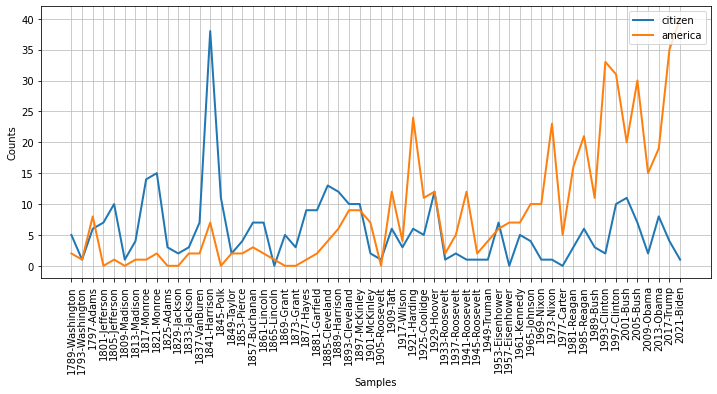

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [16]:
plt.figure(figsize = (12, 5))
cfd2.plot()

### Tuple & List
- 불변 객체 vs 가변 객체

In [17]:
#1. 빈 튜플 및 리스트 생성
emptyT = ()
emptyT = tuple()

emptyL = []
emptyL = list()

emptyT, emptyL

((), [])

In [22]:
#1-1 요소 여러개일 때
alphabetT = ('a', 'b')
alphabetT = 'a', 'b' #더 편하니 이걸 많이 씀

alphabetL = ['a', 'b']

alphabetT, alphabetL

(('a', 'b'), ['a', 'b'])

In [24]:
#1-2 요소 1개일 때 튜플 주의!!!
alphaT = ('a')
type(alphaT) #string이야

str

In [25]:
#하나의 요소 이후에 , comma 넣어 줘야 튜플로 인지
alphaT = ('b',)
type(alphaT)

tuple

#### Packing Unpacking
- packing: 한 변수에 여러 데이터를 할당하는 것.
    - list, tuple 자체
        ex) a = [1, 2, 3, 4]
- unpacking: 한 변수에 여러 데이터가 들어있을 때 여러 변수에 나누는 것
    - a = 'k', b = 'i', c = 'm'

In [26]:
a, b, c = 'kim' #unpacking
a, b, c

('k', 'i', 'm')

In [27]:
# 튜플 -> 값을 교환해야 할 때 편함

# pwd와 userld를 바꾸고 싶을 때
pwd = 'yuky'
userld = 'lee'
#1번 방법 (이 방법으로 안 해도 됨)
'''
temp1 = userld
temp2 = pwd

pwd = temp1
userld = temp2
'''
#2번 방법
pwd, userld = userld, pwd
pwd, userld

('lee', 'yuky')

In [28]:
# 튜플 연산은 리스트 연산과 비슷
('a', ) + (1, 2)

('a', 1, 2)

In [29]:
(1, 2) * 3

(1, 2, 1, 2, 1, 2)

In [31]:
# 튜플은 불변의 객체 but 연산됨
# id 값을 확인

x = ('a',)
y = (1, 2)
x + y

('a', 1, 2)

In [33]:
id(x), id(x + y)
#id 값이 다름. 즉, x나 y가 변한게 X, 새로운 변수에 할당됨

(2602676685888, 2602675679552)

In [35]:
# 비교
x = 5, 2
y = 1, 6

x > y

True

In [36]:
# 순회
for i in x:
    print(x)

(5, 2)
(5, 2)


In [38]:
# 리스트 컴프리헨션
# 주의! 리스트로 바뀜
[i for i in x]

[5, 2]

In [40]:
# tuple comprehension이란 없음
# tuple로 변경은 가능
#1번 방법
tuple([i for i in x])

#2번 방법
*[i for i in x],

#속도: 1번 > 2번
#그냥 원래 리스트컴프리헨셩 사용하는 것이 가장 좋음
#필요한 경우 외 tuple로 변환 X

(5, 2)

In [41]:
#형변환
dog = 'dog'
dogT = tuple(dog)

In [42]:
('dog',)

('dog',)

In [45]:
(dogT)

('d', 'o', 'g')

In [46]:
list(dog)

['d', 'o', 'g']

In [47]:
# slicing도 동일하게 가능함!!!!!!!!!
dogT[0]

'd'

[정리]
- tuple 장점 - 변하지 않는 데이터 시퀀스를 만들 수 있다. 타인의 접근 막는다.
    - blue = 1, white = 2
    - 메모리 사용 적다
- list 장점 - 튜플 장점 필요 없을 때 전부 리스트 사용
    - 데이터를 순차적으로 파악할 때
    - 중복 데이터를 쓸 수 있다는 점 vs set

### 리스트의 유용한 합수들
- 변경, 삭제, 추가
- 리스트 컴프리헨셩 업그레이드

In [70]:
num = list(range(5))
num

[0, 1, 2, 3, 4]

In [71]:
# 추가
num.append(6) #바지막 요소 1개 추가

In [72]:
num

[0, 1, 2, 3, 4, 6]

In [73]:
# insert(index, item)
num.insert(0, 8)
num

[8, 0, 1, 2, 3, 4, 6]

In [74]:
# 여러 개 추가
x = [6, 6, 6]
num.extend(x)
num
# 요소들이 하나씩 들어감

[8, 0, 1, 2, 3, 4, 6, 6, 6, 6]

In [75]:
num.append(x)
num
# 리스트 자체가 들어감

[8, 0, 1, 2, 3, 4, 6, 6, 6, 6, [6, 6, 6]]

In [76]:
num += x #더할 때는 요소로 하나씩 들어감
num

[8, 0, 1, 2, 3, 4, 6, 6, 6, 6, [6, 6, 6], 6, 6, 6]

In [77]:
# offset
num[0] = 9
num
# 하나를 바꿈

[9, 0, 1, 2, 3, 4, 6, 6, 6, 6, [6, 6, 6], 6, 6, 6]

In [78]:
# slice
num[:3] = 2, 2, 2
num

[2, 2, 2, 2, 3, 4, 6, 6, 6, 6, [6, 6, 6], 6, 6, 6]

In [79]:
num[:3] = 'cat'
num
# string은 한 글자씩 요소로 들어감

['c', 'a', 't', 2, 3, 4, 6, 6, 6, 6, [6, 6, 6], 6, 6, 6]

In [80]:
# 삭제
del num[:3]
num

[2, 3, 4, 6, 6, 6, 6, [6, 6, 6], 6, 6, 6]

In [81]:
# remove(value)
num.remove([6, 6, 6])
num

[2, 3, 4, 6, 6, 6, 6, 6, 6, 6]

In [82]:
# pop(index)
# 기본값 = -1 즉, num.pop()이라고 하면 가장 뒷쪽 없어짐
num.pop(0)
num

[3, 4, 6, 6, 6, 6, 6, 6, 6]

In [83]:
# clear
num.clear()
num

[]

In [85]:
# 인덱스 index
num = list(range(7))
num

[0, 1, 2, 3, 4, 5, 6]

In [86]:
num.index(4)

4

In [87]:
0 in num

True

In [88]:
# 정렬1: 변수.sort(), sorted()
sorted(num, reverse = True) #변한 값만 복사해서 출력

[6, 5, 4, 3, 2, 1, 0]

In [89]:
num  # 영구적으로 바뀐게 아님

[0, 1, 2, 3, 4, 5, 6]

In [90]:
#접근 방법: list.sort()
# 값을 할당하지 않아도 됨\
num.sort(reverse = True)

In [91]:
num  # 영구적으로 바뀜

[6, 5, 4, 3, 2, 1, 0]

In [92]:
# 정렬2: reverse(), reversed()

num.reverse() # 값 반환 O
reversed(num) #값 반환 X

In [106]:
# 할당
a = list(range(1, 5))
a

[1, 2, 3, 4]

In [107]:
#2주차쯤에 내가 물어본 질문에 대한 조교님의 답 참조

b = a # 메모리 주소를 참조하는 것
b[0] = 6
a, b

([6, 2, 3, 4], [6, 2, 3, 4])

In [108]:
id(a), id(b)

(2602687571840, 2602687571840)

In [109]:
# shallow copy(얕은 복사): 참조하지 않고 새로운 객체에 할당하는 방법
c = a.copy()
d = list(a)
e = a[:]

id(a), id(c), id(d), id(e)

(2602687571840, 2602687590016, 2602687597696, 2602676153536)

In [110]:
# deep copy(깊은 복사): 하위에 중첩된 리스트 요소가 안 바뀌도록하는 방법
a.append([1, 2, 3])
a

[6, 2, 3, 4, [1, 2, 3]]

In [111]:
f = a.copy()
# 리스트 안에 있는 어떤 요소가 가변 객체일 때
# (a의 경우 지금 가변 객체인 리스트가 들어가 있음)
# 주소는 다름!!
id(a), id(f)

(2602687571840, 2602686121472)

In [112]:
# 쉘로우 카피를 했는데도, 같이 변함
f[-1][2] = 2
print(a, f)

[6, 2, 3, 4, [1, 2, 2]] [6, 2, 3, 4, [1, 2, 2]]


In [113]:
# 위 상황 피하고 싶다면 deep copy 사용
# 차원이 다른 것까지 복사되지 않음

import copy
g = copy.deepcopy(a)
g

[6, 2, 3, 4, [1, 2, 2]]

In [114]:
# a는 바뀌지 X
g[-1][1] = 10
a, g

([6, 2, 3, 4, [1, 2, 2]], [6, 2, 3, 4, [1, 10, 2]])

In [121]:
# 순회: zip, enumerate
name = ['kate', 'royce', 'phill']
age = [77, 44, 54]

#(name, age)
for item1, item2, in zip(name, age):  #여러 리스트를 동시에 순회
    print((item1, item2)) #자료형을 튜플로 바꿔서 하기 위해 ()를 두번 씀

('kate', 77)
('royce', 44)
('phill', 54)


In [122]:
for item1 in name:
    for item2 in age:
        print((item1, item2))

('kate', 77)
('kate', 44)
('kate', 54)
('royce', 77)
('royce', 44)
('royce', 54)
('phill', 77)
('phill', 44)
('phill', 54)


In [123]:
list(zip(name, age))

[('kate', 77), ('royce', 44), ('phill', 54)]

In [124]:
# 리스트 + 인덱스 enumerate
for idx, item in enumerate(name):
    print(item, idx)

kate 0
royce 1
phill 2


In [125]:
# list(zip(name, age)) -> 리스트컴프리헨션
[(item1, item2) for item1, item2 in zip(name, age)]

[('kate', 77), ('royce', 44), ('phill', 54)]

In [128]:
# name, age를 이용해서 새로운 리스트를 생성하는데(이름, 나이), for문 사용(리스트 컴프리헨션X)
new_list = []
for i, j in zip(name, age):
    new_list.append([i, j])
print(new_list)

[['kate', 77], ['royce', 44], ['phill', 54]]


In [131]:
[(i, j) for i, j in zip(name, age)] # 리스트의 리스트 X

[('kate', 77), ('royce', 44), ('phill', 54)]

In [133]:
# 1. for문의 리스트 컴프리헨션으로 바꿔보기
for i in name:
    for j in age:
        print(i, j)
        
'''
kate, 77
kate, 44
kate, 54
형식으로 프린트
'''

kate 77
kate 44
kate 54
royce 77
royce 44
royce 54
phill 77
phill 44
phill 54


'\n(kate, 77)\n(kate, 44)\n(kate, 54)\n형식으로 프린트\n'

In [134]:
# 2. [i, j] 리스트의 리스트로 바꿔보기 (리스트 컴프리헨션)
'''
[[('kate', 77), ('royce', 77)....]]
'''
# my answer
[[(i, j)] for i, j in zip(name, age)]

[[('kate', 77)], [('royce', 44)], [('phill', 54)]]

In [138]:
# what the teacher wanted
[
    [(i, j) for i in name] for j in age
]

[[('kate', 77), ('royce', 77), ('phill', 77)],
 [('kate', 44), ('royce', 44), ('phill', 44)],
 [('kate', 54), ('royce', 54), ('phill', 54)]]

In [139]:
# 위 2.을 for문으로
output = []
for i in name:
    empty = []
    for j in age:
        print([i, j])
        empty.append([i, j])
    output.append(empty)

['kate', 77]
['kate', 44]
['kate', 54]
['royce', 77]
['royce', 44]
['royce', 54]
['phill', 77]
['phill', 44]
['phill', 54]


In [140]:
sentence = "do not judge a book by its cover"
# [(대문자, 첫글자대문자, 글자수)...]
# (튜플 형식의) 리스트 만들기
words = sentence.split()
[(word.upper(), word.title(), len(word)) for word in words]

[('DO', 'Do', 2),
 ('NOT', 'Not', 3),
 ('JUDGE', 'Judge', 5),
 ('A', 'A', 1),
 ('BOOK', 'Book', 4),
 ('BY', 'By', 2),
 ('ITS', 'Its', 3),
 ('COVER', 'Cover', 5)]

In [142]:
text = [
    ['I', 'said', 'goodnight', 'to', 'my', 'parents'],
    ['My', 'sister', 'was', 'at', 'the', 'study', 'cafe' ]
]
# 첫 문장 이후 콤마 주의!

In [143]:
# 1. 문장마다 스트링으로 변환해서 리스트로 변환
    #['문장1', '문장2']
# 2. 전체를 스트링으로 변환
    # '문장1 문장 2'
# 3. 전체 단어 리스트 가져오기
    #[I, said, goodnight, ...]

In [147]:
# 1.
[' '.join(sent) for sent in text]

['I said goodnight to my parents', 'My sister was at the study cafe']

In [145]:
# 2.
' '.join([' '.join(sent) for sent in text])

'I said goodnight to my parents My sister was at the study cafe'

In [146]:
# 3.
[word for sent in text for word in sent]

['I',
 'said',
 'goodnight',
 'to',
 'my',
 'parents',
 'My',
 'sister',
 'was',
 'at',
 'the',
 'study',
 'cafe']

### 리스트 컴프리헨션에서의 조건문
- if문 - else
- else를 사용할 때는 조건문을 반복문 앞으로 가져와 사용

In [148]:
# 짝수는 출력, 홀수는 '홀수' 프린트

In [149]:
# wrong
#[i for i in range(10) if i % 2 == 0 else '홀수'] # 반복문 + 조건문

#right
[i if i % 2 == 0 else '홀수' for i in range(10)] # 조건문 + 반복문

[0, '홀수', 2, '홀수', 4, '홀수', 6, '홀수', 8, '홀수']

## 과제: Brown Corpus 정제하기
- brown의 romance 사용
- 정규식 사용 안 됨. 배운 것으로만 하기.
- 문장 분절, 단어 분절
- 불필요한 것을 제거하기
    - 문장부호는 다 없애기, POS 제거
    - 's 나 'nt 도 건드려 보자(여럭이 되면) (she's -> she, 's)
    - 'fly-dotted' -> - 없애고 -> fly, dotted
- 글자는 5000개만
- 최대한 하드코딩 지양(품사 제거할 때 유의!)

[['They' 'neither', 'liked',...], [...], [...], ...]

In [151]:
from nltk.corpus import brown

#brown.raw(categories='romance')[:5000]

In [ ]:
# 다음 시간 중간고사!